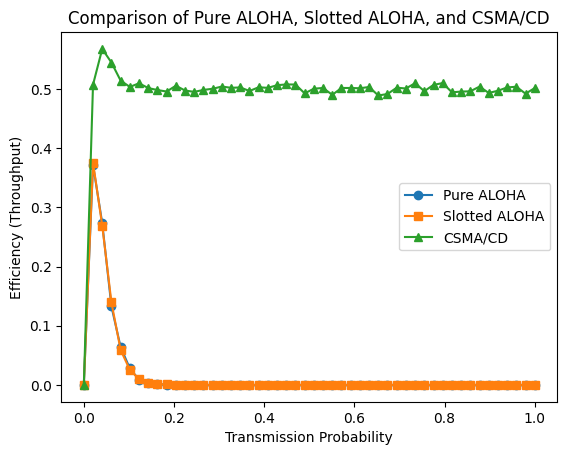

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate Pure ALOHA
def simulate_pure_aloha(n_nodes, p, n_slots):
    successes = 0
    for _ in range(n_slots):
        # Each node transmits with probability p in a slot
        transmissions = sum(1 for _ in range(n_nodes) if random.random() < p)
        if transmissions == 1: # Successful transmission occurs only when a single node transmits
            successes += 1
    return successes / n_slots # Return efficiency as successful transmissions per slot

# Function to simulate Slotted ALOHA
def simulate_slotted_aloha(n_nodes, p, n_slots):
    successes = 0
    for _ in range(n_slots):
        transmissions = sum(1 for _ in range(n_nodes) if random.random() < p)
        if transmissions == 1:
            successes += 1
    return successes / n_slots

# Function to simulate CSMA/CD
def simulate_csma_cd(n_nodes, p, n_slots):
    successes = 0
    for _ in range(n_slots):
        active_nodes = [i for i in range(n_nodes) if random.random() < p]
        if len(active_nodes) == 1:  # Only one node transmits successfully
            successes += 1
        elif len(active_nodes) > 1:
            # Simulating backoff and retransmission
            if random.random() < 0.5:  # 50% chance of successful retransmission
                successes += 1
    return successes / n_slots

# Simulation parameters
n_nodes = 50
ps = np.linspace(0, 1, 50)

# Compute efficiency for each protocol
pure_eff = [simulate_pure_aloha(n_nodes, p, 10000) for p in ps]
slotted_eff = [simulate_slotted_aloha(n_nodes, p, 10000) for p in ps]
csma_cd_eff = [simulate_csma_cd(n_nodes, p, 10000) for p in ps]

# Plot the results
plt.plot(ps, pure_eff, label='Pure ALOHA', marker='o')
plt.plot(ps, slotted_eff, label='Slotted ALOHA', marker='s')
plt.plot(ps, csma_cd_eff, label='CSMA/CD', marker='^')
plt.xlabel('Transmission Probability')
plt.ylabel('Efficiency (Throughput)')
plt.title('Comparison of Pure ALOHA, Slotted ALOHA, and CSMA/CD')
plt.legend()
plt.show()